In [1]:
import pickle
import numpy as np

with open('/home/yuanliang/pinns-torch/examples/schrodinger/outputs/21-11-15_model_0/predictions.pkl', 'rb') as f:
    data = pickle.load(f)


print("Data type:", type(data))
print("Keys (if dict):", data.keys() if isinstance(data, dict) else "Not a dict")


if isinstance(data, dict):
    for key, value in data.items():
        print(f"\nKey: {key}")
        print(f"  Type: {type(value)}")
        if hasattr(value, 'shape'):
            print(f"  Shape: {value.shape}")
        print(f"  Value sample: {value}")

Data type: <class 'dict'>
Keys (if dict): dict_keys(['u', 'v', 'h'])

Key: u
  Type: <class 'torch.Tensor'>
  Shape: torch.Size([51456, 1])
  Value sample: tensor([[0.0400],
        [0.0401],
        [0.0402],
        ...,
        [0.0284],
        [0.0282],
        [0.0280]])

Key: v
  Type: <class 'torch.Tensor'>
  Shape: torch.Size([51456, 1])
  Value sample: tensor([[0.0022],
        [0.0024],
        [0.0026],
        ...,
        [0.0399],
        [0.0400],
        [0.0401]])

Key: h
  Type: <class 'torch.Tensor'>
  Shape: torch.Size([51456, 1])
  Value sample: tensor([[0.0401],
        [0.0402],
        [0.0402],
        ...,
        [0.0489],
        [0.0490],
        [0.0490]])


Total data points: 51456
Expected points (nx * nt): 51456


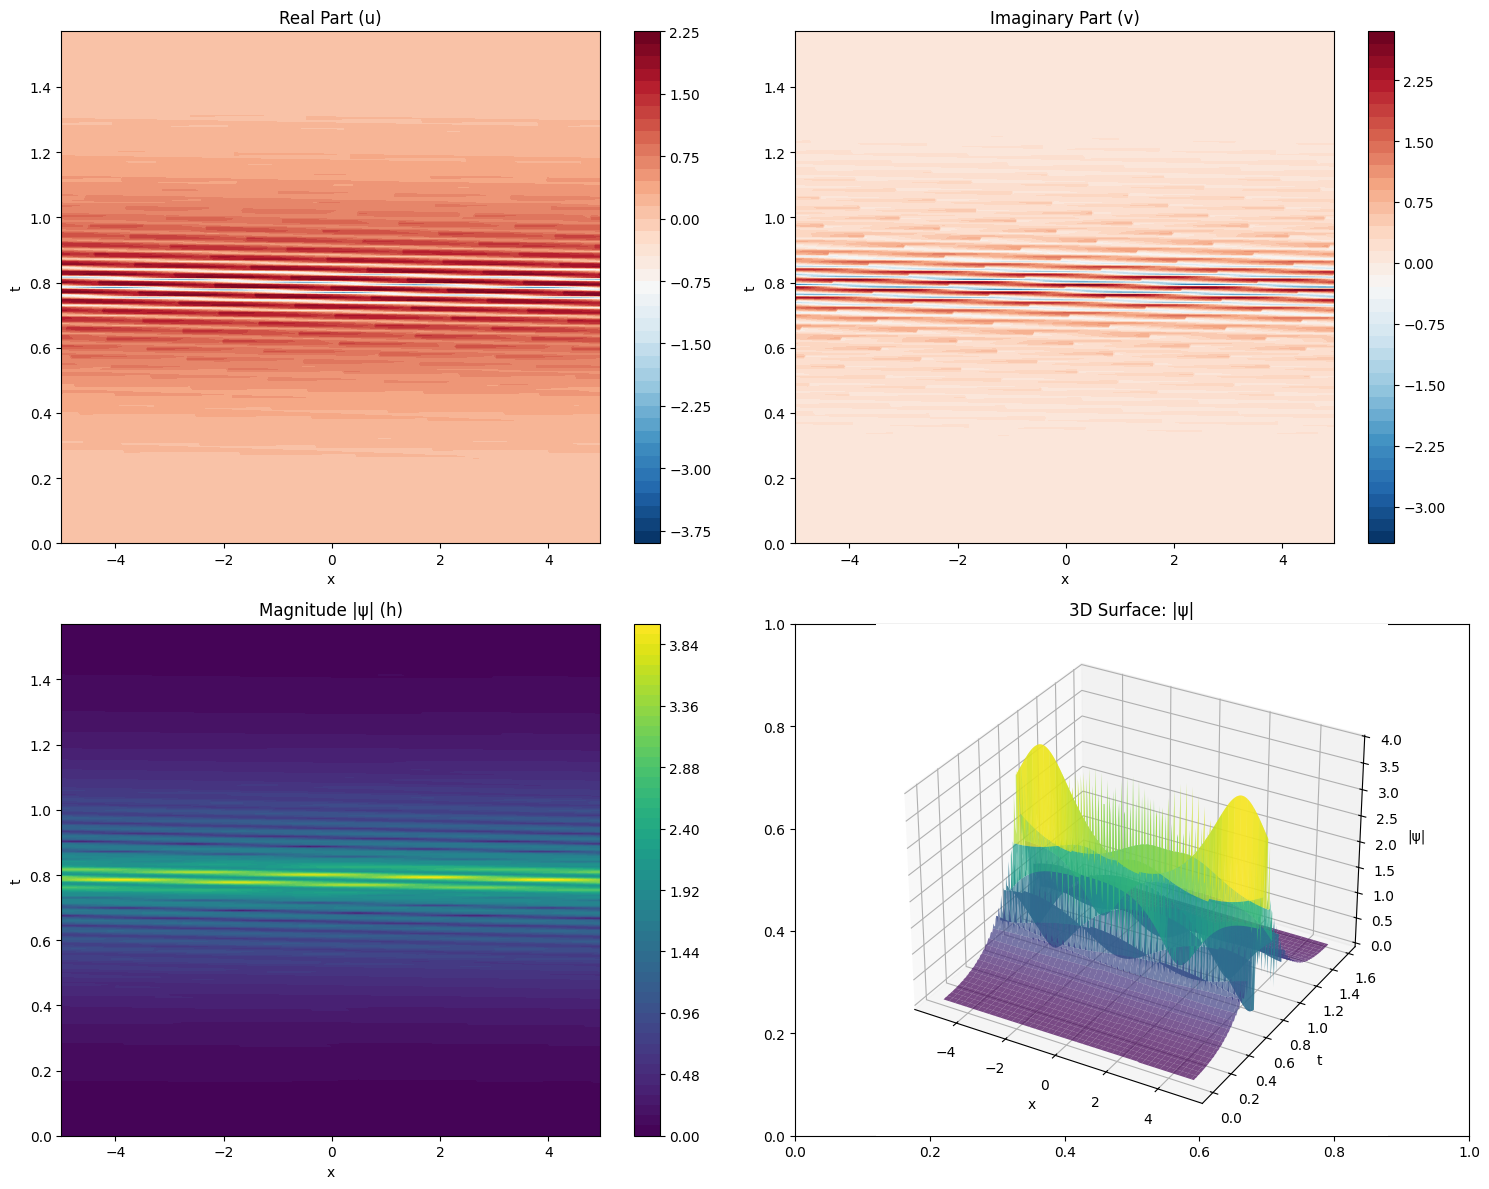

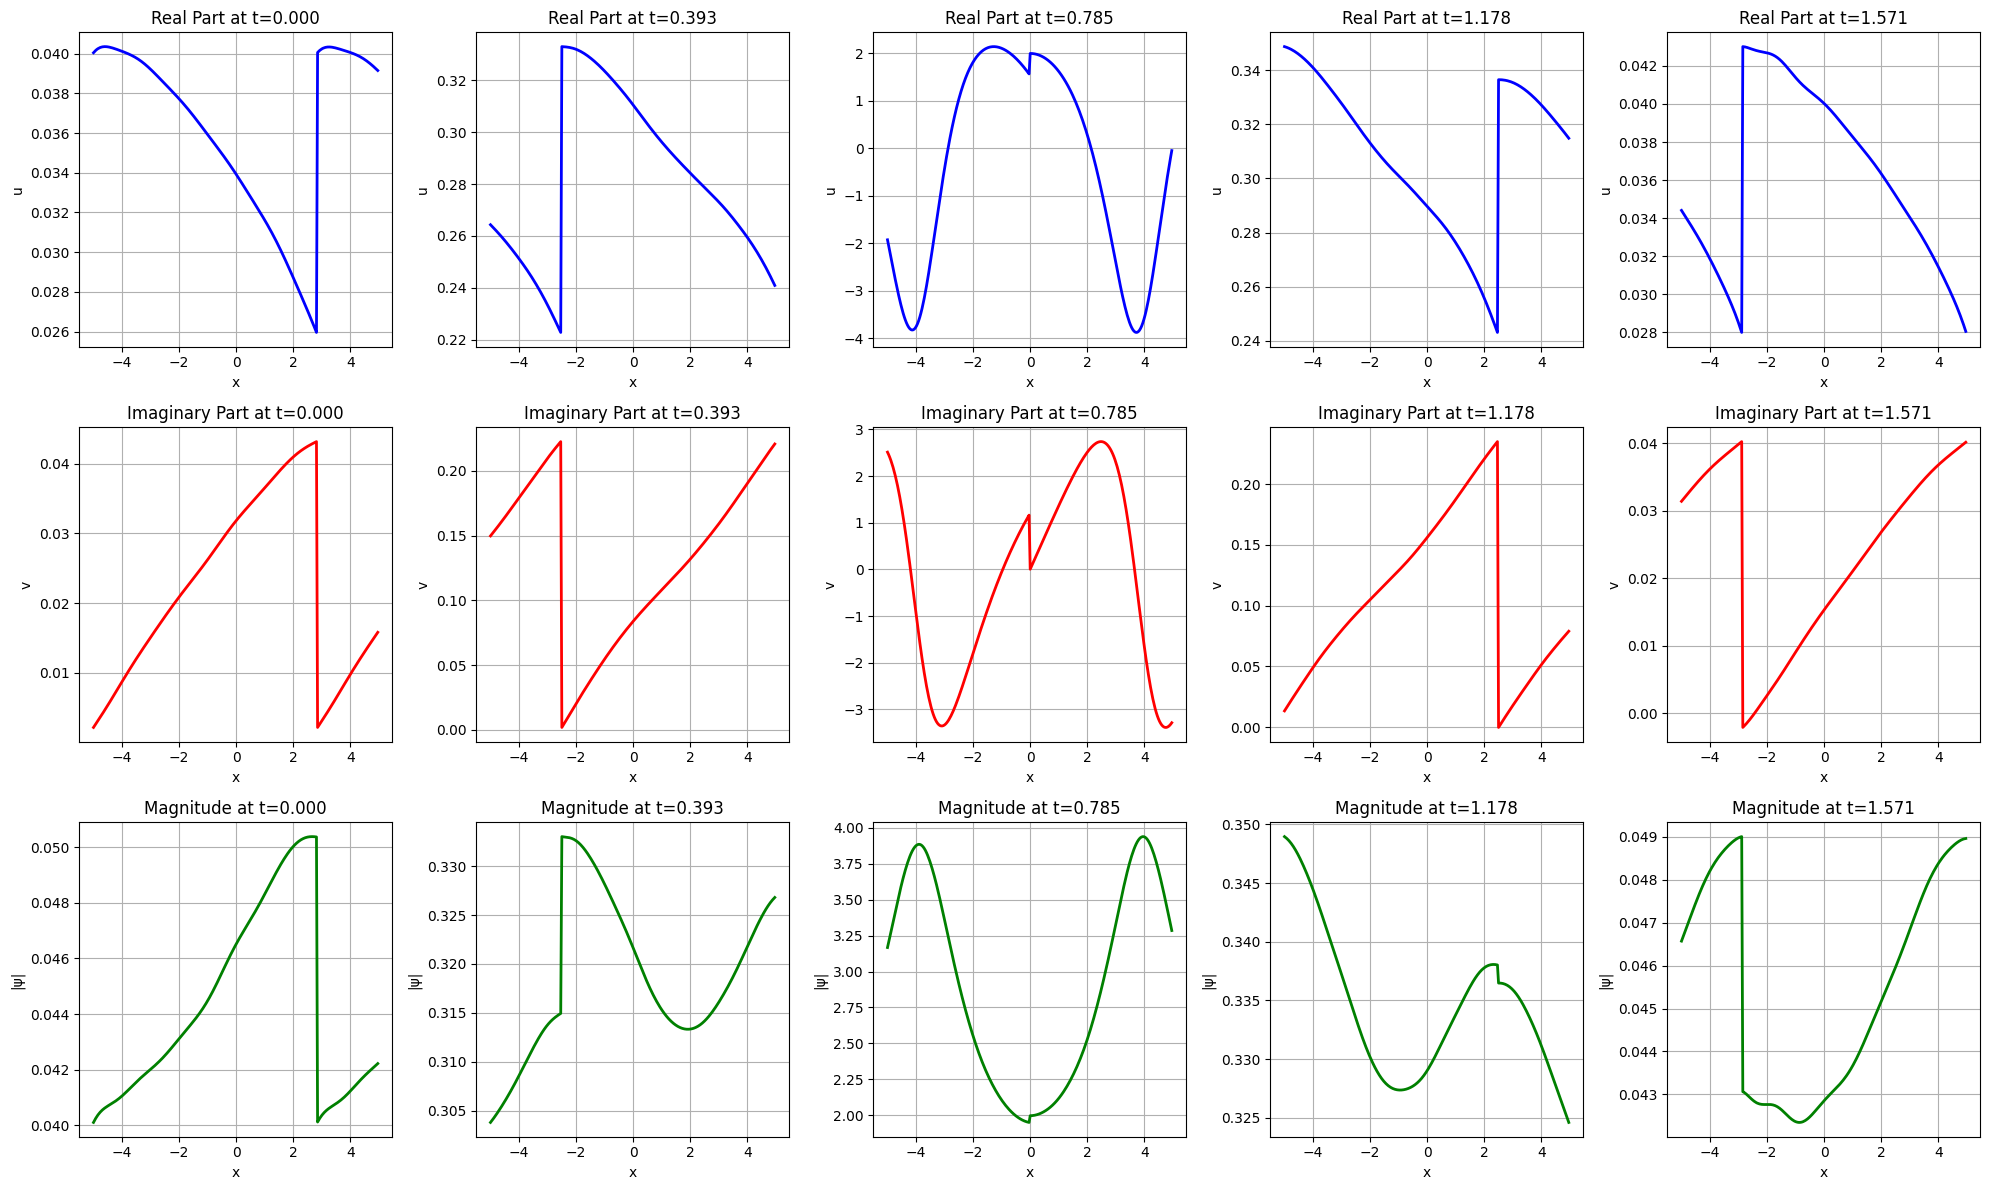


=== Prediction Statistics ===
Real part (u):
  Range: [-3.877374, 2.143821]
  Mean: 0.367896, Std: 0.599058

Imaginary part (v):
  Range: [-3.385595, 2.738862]
  Mean: 0.141828, Std: 0.525214

Magnitude (h):
  Range: [0.004102, 3.938665]
  Mean: 0.581317, Std: 0.672498

Probability conservation:
  Initial total: 0.502383
  Final total: 0.531218
  Variation: 1137.22%


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch

def load_and_visualize_predictions(pkl_path):
    """Load and visualize Schrödinger equation predictions"""
    
    # Load the predictions
    with open(pkl_path, 'rb') as f:
        predictions = pickle.load(f)
    
    # Convert tensors to numpy
    u = predictions['u'].detach().cpu().numpy().squeeze()
    v = predictions['v'].detach().cpu().numpy().squeeze()
    h = predictions['h'].detach().cpu().numpy().squeeze()
    
    # Based on your config: 256 spatial points, 201 time points
    n_x = 256
    n_t = 201
    total_points = n_x * n_t
    
    print(f"Total data points: {len(u)}")
    print(f"Expected points (nx * nt): {total_points}")
    
    # Reshape data to 2D grid (time, space)
    u_grid = u.reshape(n_t, n_x)
    v_grid = v.reshape(n_t, n_x)
    h_grid = h.reshape(n_t, n_x)
    
    # Create spatial and temporal coordinates
    x = np.linspace(-5, 4.9609375, n_x)
    t = np.linspace(0, 1.57079633, n_t)
    X, T = np.meshgrid(x, t)
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot u component
    im1 = axes[0, 0].contourf(X, T, u_grid, levels=50, cmap='RdBu_r')
    axes[0, 0].set_title('Real Part (u)')
    axes[0, 0].set_xlabel('x')
    axes[0, 0].set_ylabel('t')
    plt.colorbar(im1, ax=axes[0, 0])
    
    # Plot v component
    im2 = axes[0, 1].contourf(X, T, v_grid, levels=50, cmap='RdBu_r')
    axes[0, 1].set_title('Imaginary Part (v)')
    axes[0, 1].set_xlabel('x')
    axes[0, 1].set_ylabel('t')
    plt.colorbar(im2, ax=axes[0, 1])
    
    # Plot magnitude h
    im3 = axes[1, 0].contourf(X, T, h_grid, levels=50, cmap='viridis')
    axes[1, 0].set_title('Magnitude |ψ| (h)')
    axes[1, 0].set_xlabel('x')
    axes[1, 0].set_ylabel('t')
    plt.colorbar(im3, ax=axes[1, 0])
    
    # Plot 3D surface of magnitude
    ax_3d = fig.add_subplot(2, 2, 4, projection='3d')
    surf = ax_3d.plot_surface(X, T, h_grid, cmap='viridis', alpha=0.7)
    ax_3d.set_title('3D Surface: |ψ|')
    ax_3d.set_xlabel('x')
    ax_3d.set_ylabel('t')
    ax_3d.set_zlabel('|ψ|')
    
    plt.tight_layout()
    plt.show()
    
    return u_grid, v_grid, h_grid, X, T

def plot_time_evolution(u_grid, v_grid, h_grid, X, T, time_indices=None):
    """Plot evolution at specific time steps"""
    
    if time_indices is None:
        time_indices = [0, len(T)//4, len(T)//2, 3*len(T)//4, -1]
    
    fig, axes = plt.subplots(3, len(time_indices), figsize=(20, 12))
    
    for i, t_idx in enumerate(time_indices):
        x = X[0, :]
        
        # Real part
        axes[0, i].plot(x, u_grid[t_idx, :], 'b-', linewidth=2)
        axes[0, i].set_title(f'Real Part at t={T[t_idx, 0]:.3f}')
        axes[0, i].set_xlabel('x')
        axes[0, i].set_ylabel('u')
        axes[0, i].grid(True)
        
        # Imaginary part
        axes[1, i].plot(x, v_grid[t_idx, :], 'r-', linewidth=2)
        axes[1, i].set_title(f'Imaginary Part at t={T[t_idx, 0]:.3f}')
        axes[1, i].set_xlabel('x')
        axes[1, i].set_ylabel('v')
        axes[1, i].grid(True)
        
        # Magnitude
        axes[2, i].plot(x, h_grid[t_idx, :], 'g-', linewidth=2)
        axes[2, i].set_title(f'Magnitude at t={T[t_idx, 0]:.3f}')
        axes[2, i].set_xlabel('x')
        axes[2, i].set_ylabel('|ψ|')
        axes[2, i].grid(True)
    
    plt.tight_layout()
    plt.show()

def analyze_statistics(u_grid, v_grid, h_grid):
    """Print basic statistics of the predictions"""
    
    print("\n=== Prediction Statistics ===")
    print(f"Real part (u):")
    print(f"  Range: [{u_grid.min():.6f}, {u_grid.max():.6f}]")
    print(f"  Mean: {u_grid.mean():.6f}, Std: {u_grid.std():.6f}")
    
    print(f"\nImaginary part (v):")
    print(f"  Range: [{v_grid.min():.6f}, {v_grid.max():.6f}]")
    print(f"  Mean: {v_grid.mean():.6f}, Std: {v_grid.std():.6f}")
    
    print(f"\nMagnitude (h):")
    print(f"  Range: [{h_grid.min():.6f}, {h_grid.max():.6f}]")
    print(f"  Mean: {h_grid.mean():.6f}, Std: {h_grid.std():.6f}")
    
    # Check conservation of probability (should be constant for Schrödinger)
    total_prob = np.sum(h_grid**2, axis=1)  # Integrate over space at each time
    print(f"\nProbability conservation:")
    print(f"  Initial total: {total_prob[0]:.6f}")
    print(f"  Final total: {total_prob[-1]:.6f}")
    print(f"  Variation: {(total_prob.max() - total_prob.min())/total_prob.mean()*100:.2f}%")

if __name__ == "__main__":
    # Path to your predictions file
    pkl_path = '/home/yuanliang/pinns-torch/examples/schrodinger/outputs/21-11-15_model_0/predictions.pkl'
    
    # Load and visualize
    u_grid, v_grid, h_grid, X, T = load_and_visualize_predictions(pkl_path)
    
    # Show time evolution
    plot_time_evolution(u_grid, v_grid, h_grid, X, T)
    
    # Print statistics
    analyze_statistics(u_grid, v_grid, h_grid)

Loaded model_0: shape (51456,) -> (201, 256)
Loaded model_1: shape (51456,) -> (201, 256)
Loaded model_2: shape (51456,) -> (201, 256)
Loaded model_3: shape (51456,) -> (201, 256)
Loaded model_4: shape (51456,) -> (201, 256)
Plotting individual models...


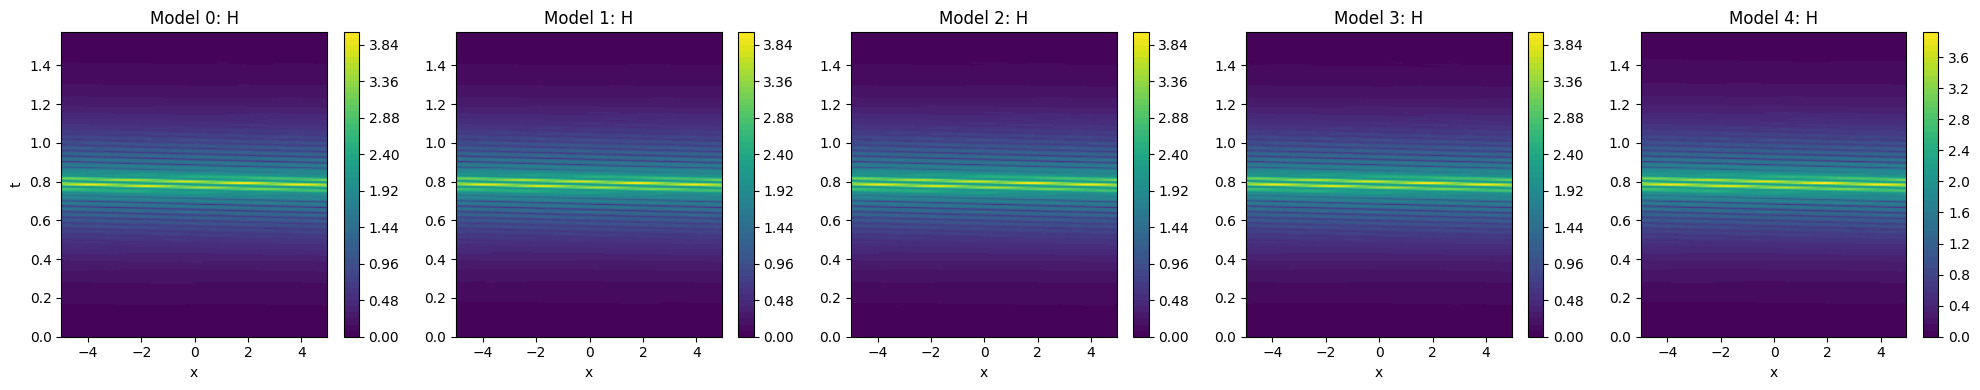

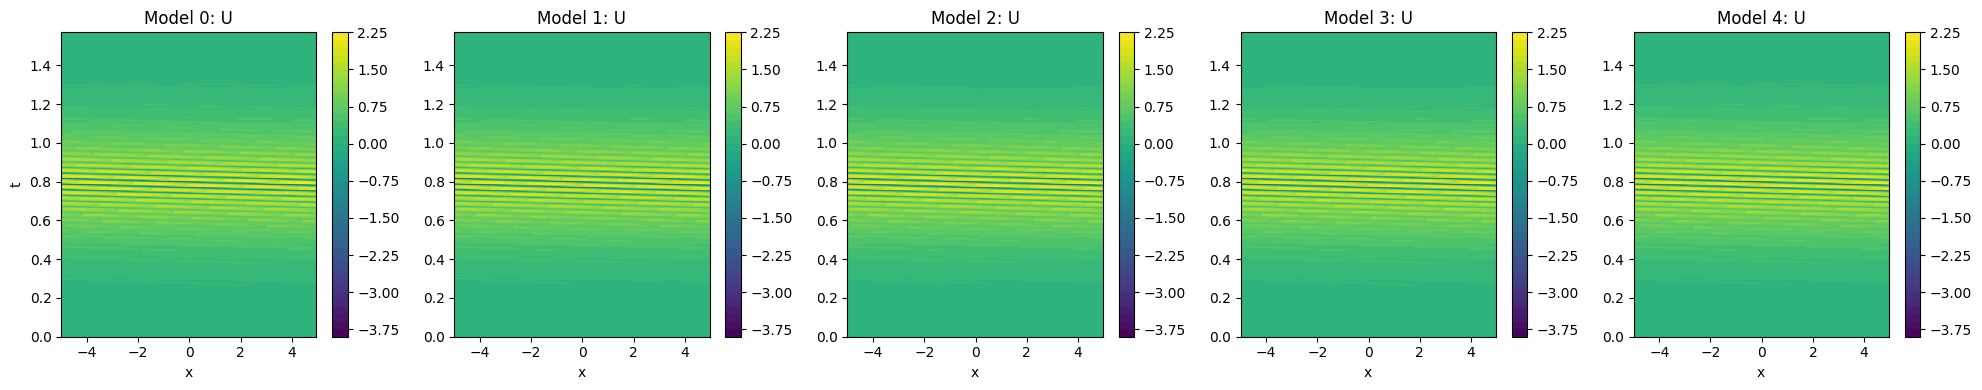

Plotting ensemble summary...


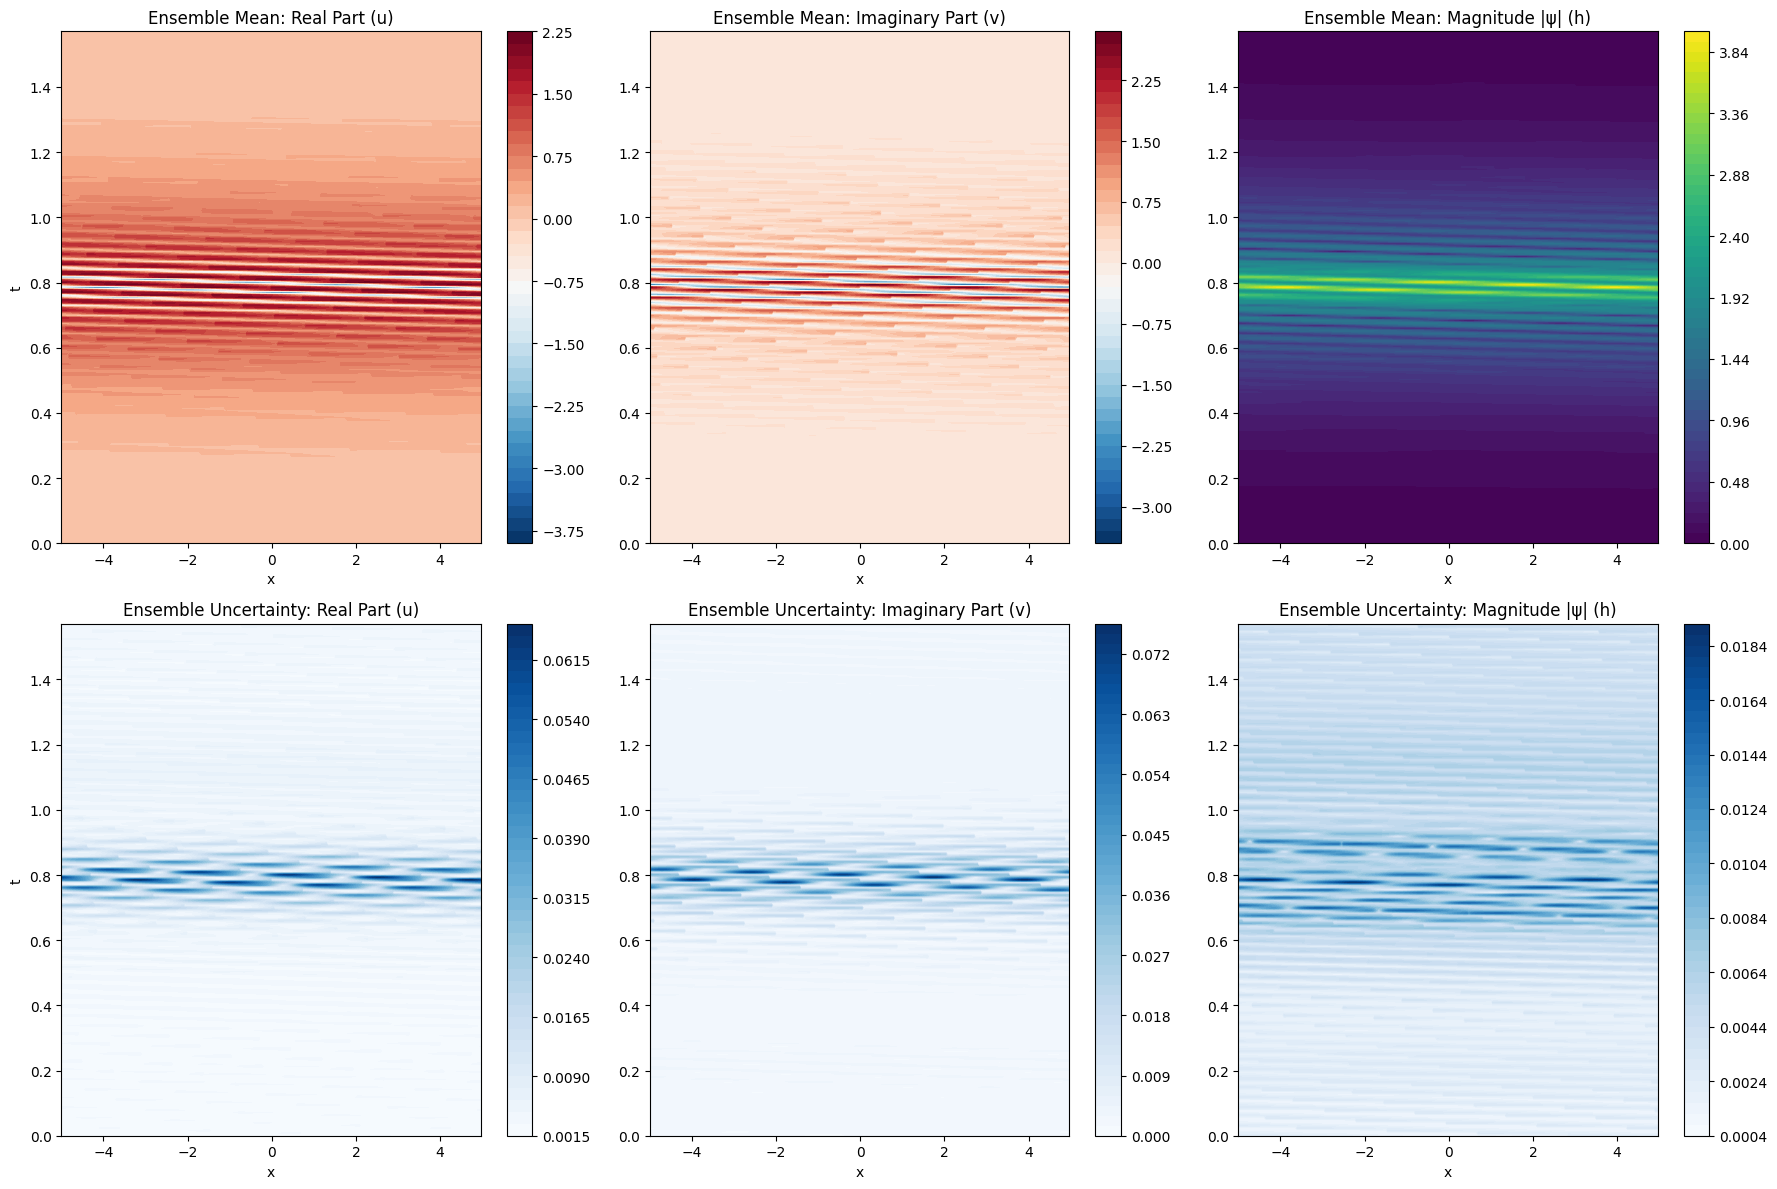


=== Ensemble Variation Analysis ===
Number of models: 5

U component:
  Mean value across models: 0.365595
  Std within models: 0.599394
  Min pairwise difference: 0.004716
  Max pairwise difference: 0.011465
  Relative variation: 3.14%

V component:
  Mean value across models: 0.141678
  Std within models: 0.524420
  Min pairwise difference: 0.004533
  Max pairwise difference: 0.011515
  Relative variation: 8.13%

H component:
  Mean value across models: 0.579782
  Std within models: 0.672217
  Min pairwise difference: 0.003791
  Max pairwise difference: 0.008190
  Relative variation: 1.41%
Analyzing uncertainty hotspots...


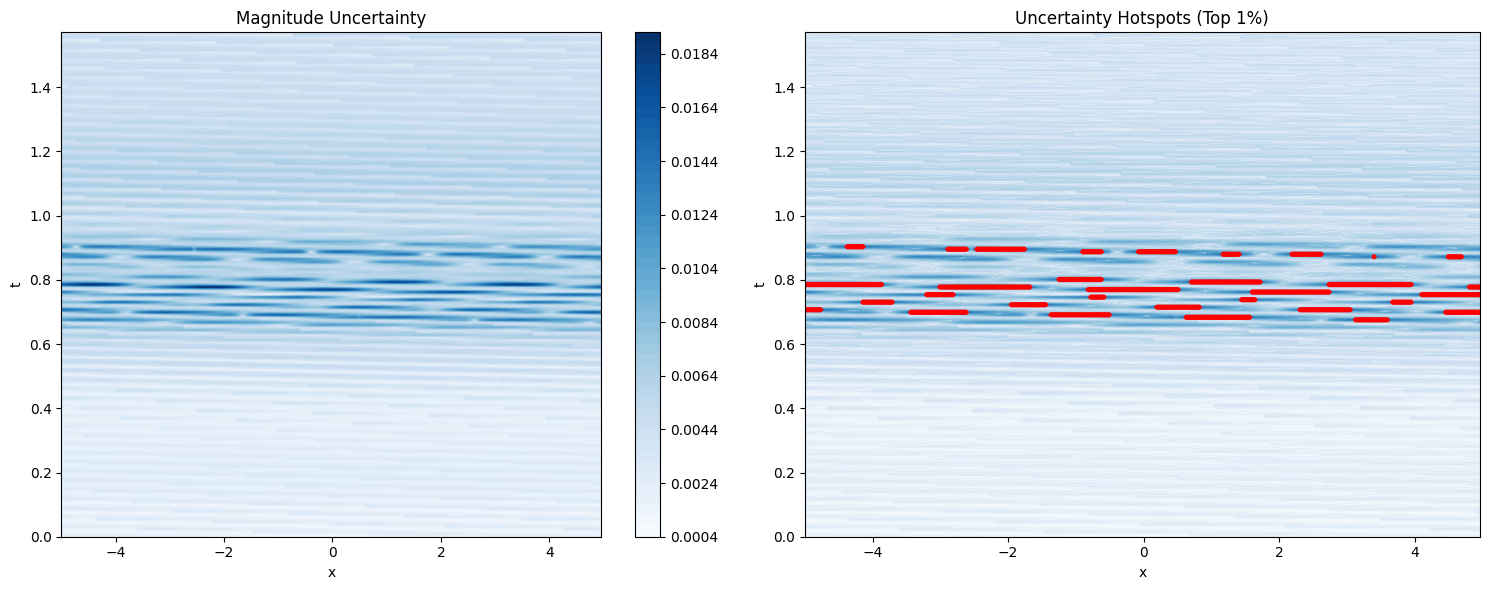


=== Uncertainty Hotspots ===
Threshold for top 1%: 0.013487
Number of hotspot points: 515
Percentage of domain: 1.00%


In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
from pathlib import Path

def load_ensemble_predictions(base_path, n_models=5):
    """Load predictions from all ensemble models"""
    
    ensemble_data = {}
    
    for i in range(n_models):
        pkl_path = f"{base_path}/21-11-15_model_{i}/predictions.pkl"
        
        try:
            with open(pkl_path, 'rb') as f:
                predictions = pickle.load(f)
            
            # Convert to numpy and reshape
            u = predictions['u'].detach().cpu().numpy().squeeze()
            v = predictions['v'].detach().cpu().numpy().squeeze()
            h = predictions['h'].detach().cpu().numpy().squeeze()
            
            # Reshape to 2D grid (201 time points, 256 spatial points)
            n_t, n_x = 201, 256
            ensemble_data[f'model_{i}'] = {
                'u': u.reshape(n_t, n_x),
                'v': v.reshape(n_t, n_x),
                'h': h.reshape(n_t, n_x)
            }
            
            print(f"Loaded model_{i}: shape {u.shape} -> {ensemble_data[f'model_{i}']['u'].shape}")
            
        except FileNotFoundError:
            print(f"Warning: Could not find {pkl_path}")
            continue
    
    return ensemble_data

def compute_ensemble_statistics(ensemble_data):
    """Compute mean and std across ensemble models"""
    
    n_models = len(ensemble_data)
    if n_models == 0:
        return None, None
    
    # Get dimensions from first model
    first_model = list(ensemble_data.values())[0]
    n_t, n_x = first_model['u'].shape
    
    # Stack all predictions
    u_stack = np.stack([ensemble_data[f'model_{i}']['u'] for i in range(n_models)])
    v_stack = np.stack([ensemble_data[f'model_{i}']['v'] for i in range(n_models)])
    h_stack = np.stack([ensemble_data[f'model_{i}']['h'] for i in range(n_models)])
    
    # Compute statistics
    ensemble_mean = {
        'u': np.mean(u_stack, axis=0),
        'v': np.mean(v_stack, axis=0),
        'h': np.mean(h_stack, axis=0)
    }
    
    ensemble_std = {
        'u': np.std(u_stack, axis=0),
        'v': np.std(v_stack, axis=0),
        'h': np.std(h_stack, axis=0)
    }
    
    return ensemble_mean, ensemble_std

def plot_individual_models(ensemble_data, component='h'):
    """Plot the same component for all models side by side"""
    
    n_models = len(ensemble_data)
    fig, axes = plt.subplots(1, n_models, figsize=(20, 4))
    
    # Create coordinate grids
    x = np.linspace(-5, 4.9609375, 256)
    t = np.linspace(0, 1.57079633, 201)
    X, T = np.meshgrid(x, t)
    
    for i, (model_name, data) in enumerate(ensemble_data.items()):
        im = axes[i].contourf(X, T, data[component], levels=50, cmap='viridis')
        axes[i].set_title(f'{model_name.replace("_", " ").title()}: {component.upper()}')
        axes[i].set_xlabel('x')
        if i == 0:
            axes[i].set_ylabel('t')
        plt.colorbar(im, ax=axes[i])
    
    plt.tight_layout()
    plt.show()

def plot_ensemble_summary(ensemble_mean, ensemble_std):
    """Plot ensemble mean and uncertainty"""
    
    # Create coordinate grids
    x = np.linspace(-5, 4.9609375, 256)
    t = np.linspace(0, 1.57079633, 201)
    X, T = np.meshgrid(x, t)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Row 1: Ensemble means
    components = ['u', 'v', 'h']
    titles = ['Real Part (u)', 'Imaginary Part (v)', 'Magnitude |ψ| (h)']
    
    for i, (comp, title) in enumerate(zip(components, titles)):
        im = axes[0, i].contourf(X, T, ensemble_mean[comp], levels=50, cmap='RdBu_r' if comp in ['u', 'v'] else 'viridis')
        axes[0, i].set_title(f'Ensemble Mean: {title}')
        axes[0, i].set_xlabel('x')
        if i == 0:
            axes[0, i].set_ylabel('t')
        plt.colorbar(im, ax=axes[0, i])
    
    # Row 2: Ensemble uncertainties (std)
    for i, (comp, title) in enumerate(zip(components, titles)):
        im = axes[1, i].contourf(X, T, ensemble_std[comp], levels=50, cmap='Blues')
        axes[1, i].set_title(f'Ensemble Uncertainty: {title}')
        axes[1, i].set_xlabel('x')
        if i == 0:
            axes[1, i].set_ylabel('t')
        plt.colorbar(im, ax=axes[1, i])
    
    plt.tight_layout()
    plt.show()

def analyze_ensemble_variations(ensemble_data):
    """Analyze how much models differ from each other"""
    
    n_models = len(ensemble_data)
    print(f"\n=== Ensemble Variation Analysis ===")
    print(f"Number of models: {n_models}")
    
    for component in ['u', 'v', 'h']:
        # Get all predictions for this component
        predictions = [ensemble_data[f'model_{i}'][component] for i in range(n_models)]
        
        # Compute pairwise differences
        max_diff = 0
        min_diff = float('inf')
        
        for i in range(n_models):
            for j in range(i+1, n_models):
                diff = np.mean(np.abs(predictions[i] - predictions[j]))
                max_diff = max(max_diff, diff)
                min_diff = min(min_diff, diff)
        
        mean_val = np.mean([np.mean(pred) for pred in predictions])
        std_val = np.mean([np.std(pred) for pred in predictions])
        
        print(f"\n{component.upper()} component:")
        print(f"  Mean value across models: {mean_val:.6f}")
        print(f"  Std within models: {std_val:.6f}")
        print(f"  Min pairwise difference: {min_diff:.6f}")
        print(f"  Max pairwise difference: {max_diff:.6f}")
        print(f"  Relative variation: {max_diff/abs(mean_val)*100:.2f}%")

def plot_uncertainty_hotspots(ensemble_std):
    """Identify and visualize regions with highest uncertainty"""
    
    # Find hotspots for magnitude uncertainty
    h_std = ensemble_std['h']
    
    # Get top 1% most uncertain points
    threshold = np.percentile(h_std, 99)
    hotspots = h_std > threshold
    
    # Create coordinate grids
    x = np.linspace(-5, 4.9609375, 256)
    t = np.linspace(0, 1.57079633, 201)
    X, T = np.meshgrid(x, t)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Original uncertainty
    im1 = axes[0].contourf(X, T, h_std, levels=50, cmap='Blues')
    axes[0].set_title('Magnitude Uncertainty')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('t')
    plt.colorbar(im1, ax=axes[0])
    
    # Hotspots overlay
    axes[1].contourf(X, T, h_std, levels=50, cmap='Blues', alpha=0.7)
    axes[1].contour(X, T, hotspots.astype(float), levels=[0.5], colors='red', linewidths=2)
    axes[1].set_title('Uncertainty Hotspots (Top 1%)')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('t')
    
    plt.tight_layout()
    plt.show()
    
    # Print hotspot statistics
    print(f"\n=== Uncertainty Hotspots ===")
    print(f"Threshold for top 1%: {threshold:.6f}")
    print(f"Number of hotspot points: {np.sum(hotspots)}")
    print(f"Percentage of domain: {np.sum(hotspots)/hotspots.size*100:.2f}%")

if __name__ == "__main__":
    # Base path containing all model directories
    base_path = "/home/yuanliang/pinns-torch/examples/schrodinger/outputs"
    
    # Load all ensemble predictions
    ensemble_data = load_ensemble_predictions(base_path)
    
    if len(ensemble_data) > 0:
        # Plot individual models for comparison
        print("Plotting individual models...")
        plot_individual_models(ensemble_data, component='h')  # Magnitude
        plot_individual_models(ensemble_data, component='u')  # Real part
        
        # Compute ensemble statistics
        ensemble_mean, ensemble_std = compute_ensemble_statistics(ensemble_data)
        
        # Plot ensemble summary
        print("Plotting ensemble summary...")
        plot_ensemble_summary(ensemble_mean, ensemble_std)
        
        # Analyze variations
        analyze_ensemble_variations(ensemble_data)
        
        # Plot uncertainty hotspots
        print("Analyzing uncertainty hotspots...")
        plot_uncertainty_hotspots(ensemble_std)
        
    else:
        print("No ensemble data could be loaded!")